In [13]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

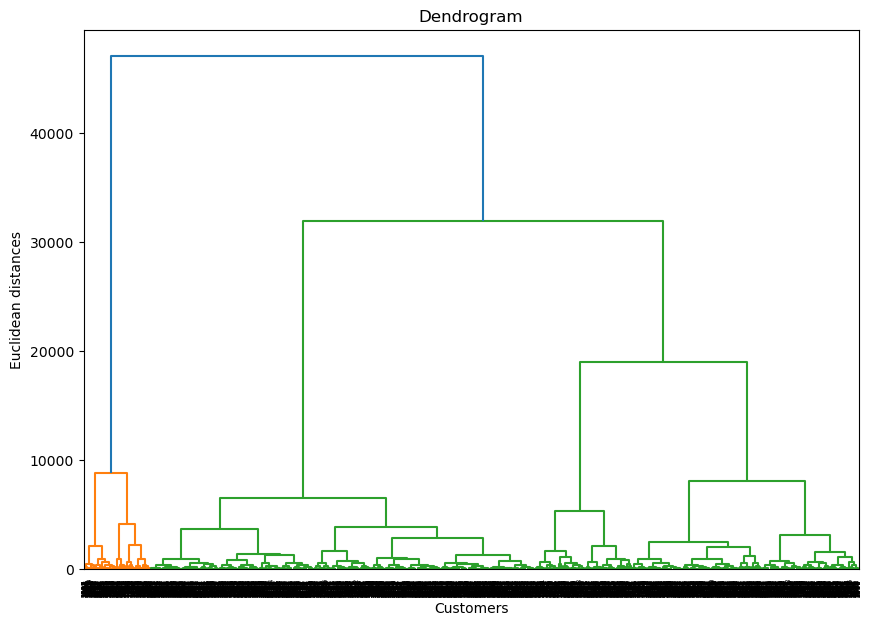

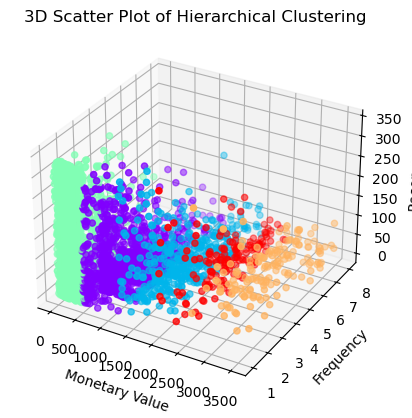

In [1]:
# Load dataset
df = pd.read_csv('online_transactions_non_outliers.csv')

# Select features for clustering
features = ['MonetaryValue', 'Frequency', 'Recency']
X = df[features]

# Create a linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster'] = labels

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MonetaryValue'], df['Frequency'], df['Recency'], c=df['Cluster'], cmap='rainbow')

ax.set_title('3D Scatter Plot of Hierarchical Clustering')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

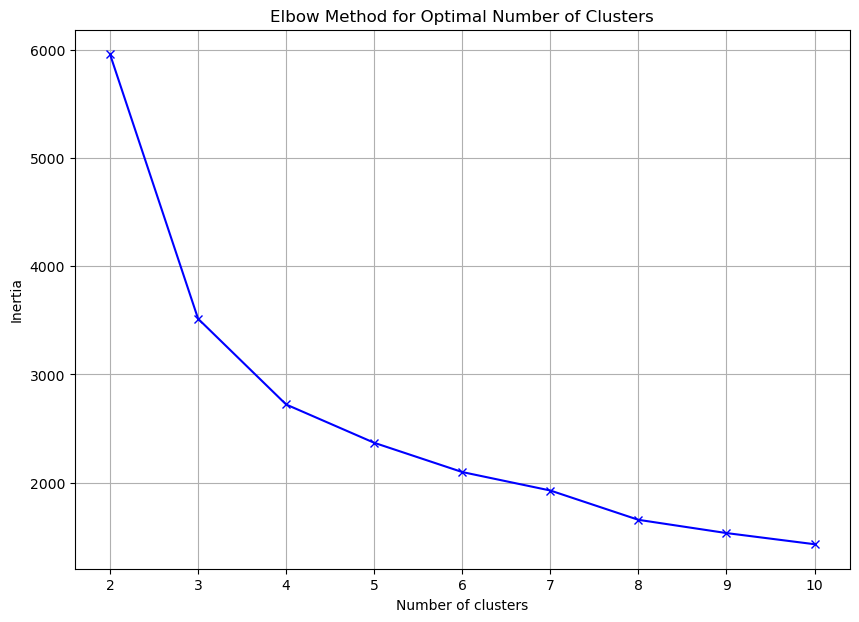

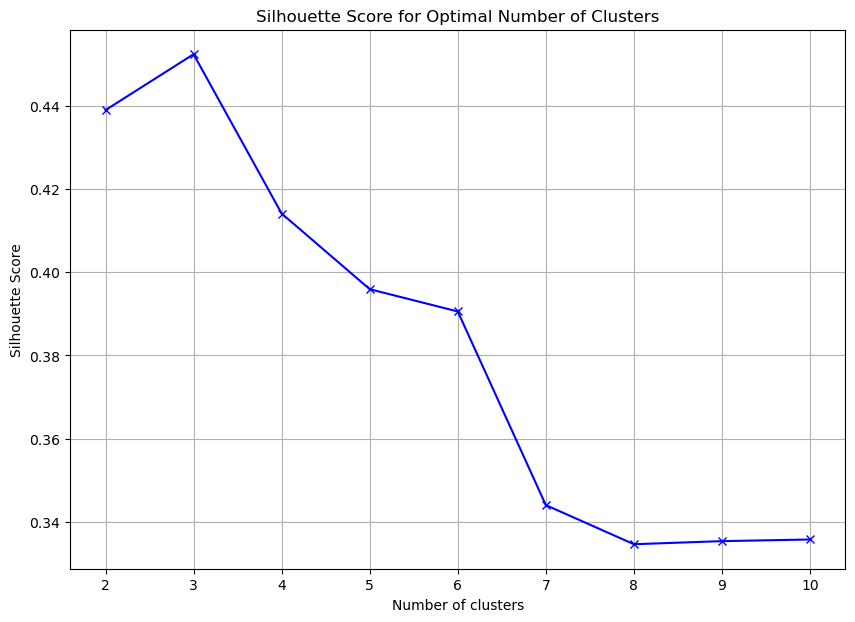

In [31]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    inertia.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
# plt.savefig('ElbowMethodOptimalNumber_of_HierarchicalClusters.png', dpi=300)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.grid(True)
# plt.savefig('SilhouetteScoreNumber_of_HierarchicalClusters.png', dpi=300)
plt.show()

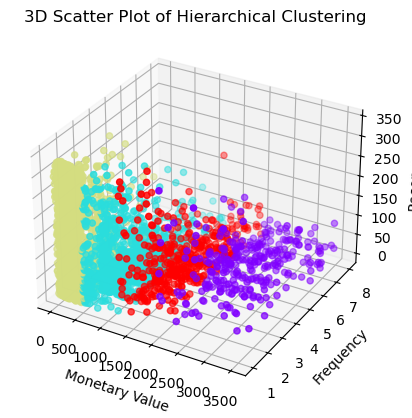

In [9]:
# Optimal Clusters
# Perform hierarchical clustering
cluster_optimal = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels_optimal = cluster_optimal.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster'] = labels_optimal

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MonetaryValue'], df['Frequency'], df['Recency'], c=df['Cluster'], cmap='rainbow')

ax.set_title('3D Scatter Plot of Hierarchical Clustering')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

In [15]:
# Scaling the data to ensure fairness through equally weighted data points
# initialise the scaler
scaler = StandardScaler()
# Fit and transform the data - returns numpy array
scaled_data = scaler.fit_transform(df[["MonetaryValue", "Frequency", "Recency"]])
# numpy array of scaled non outlier data
scaled_data

array([[-0.01284347,  0.28381239, -0.20811008],
       [ 0.91152715, -0.84131744, -0.81576892],
       [-0.68580714, -0.84131744,  2.34188685],
       ...,
       [-0.97911295, -0.84131744,  0.9421013 ],
       [-0.84558863, -0.27875253, -0.93513048],
       [ 1.43300396,  0.28381239, -0.55534371]])

In [19]:
# Passing the scaled data numpy array into a dataframe object
scaled_data_df = pd.DataFrame(scaled_data, index=df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.012843,0.283812,-0.208110
1,0.911527,-0.841317,-0.815769
2,-0.685807,-0.841317,2.341887
3,0.812912,2.534072,-0.631301
4,-0.967879,-0.841317,1.191675
...,...,...,...
3664,-0.851288,-0.841317,-0.218961
3665,-0.842087,-0.841317,1.994653
3666,-0.979113,-0.841317,0.942101
3667,-0.845589,-0.278753,-0.935130


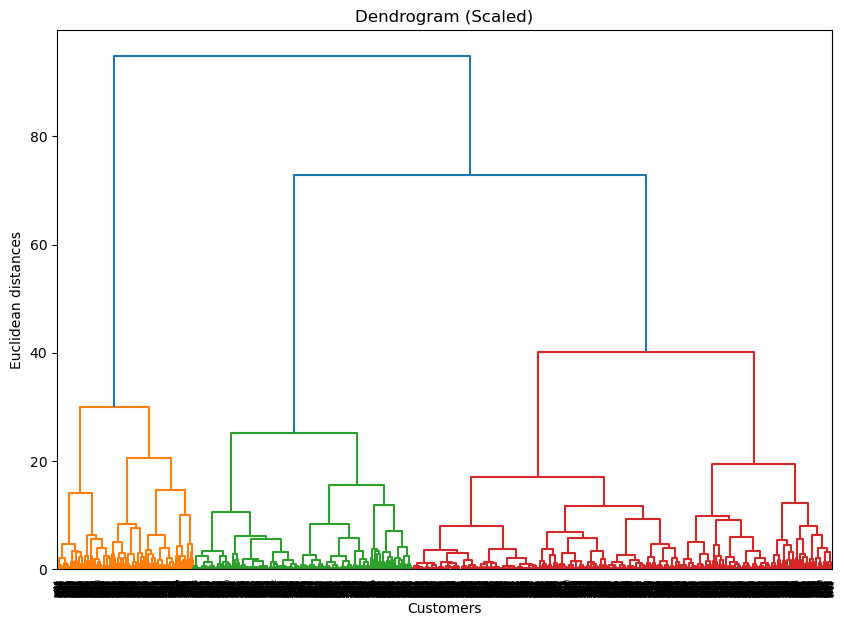

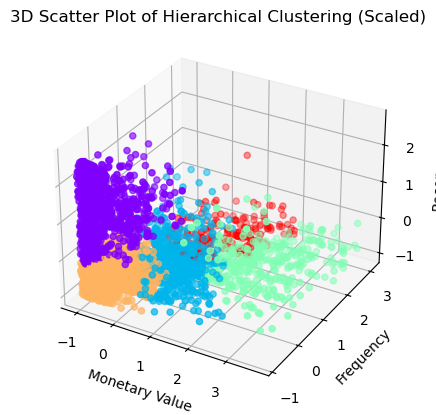

In [37]:
# Select features for clustering
features = ['MonetaryValue', 'Frequency', 'Recency']
X_scaled = scaled_data_df[features]

# Create a linkage matrix
Z_scaled = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_scaled)
plt.title('Dendrogram (Scaled)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
# plt.savefig('Dendogram_non_outliers.png', dpi=300)
plt.show()

# Perform hierarchical clustering
cluster_scaled = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_scaled = cluster_scaled.fit_predict(X_scaled)

# Add cluster labels to dataframe
scaled_data_df['Cluster'] = labels_scaled

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c=scaled_data_df['Cluster'], cmap='rainbow')

ax.set_title('3D Scatter Plot of Hierarchical Clustering (Scaled)')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
# plt.savefig('3DScatterPlot_of_Hierarchical_Clustering(Scaled).png', dpi=300)
plt.show()

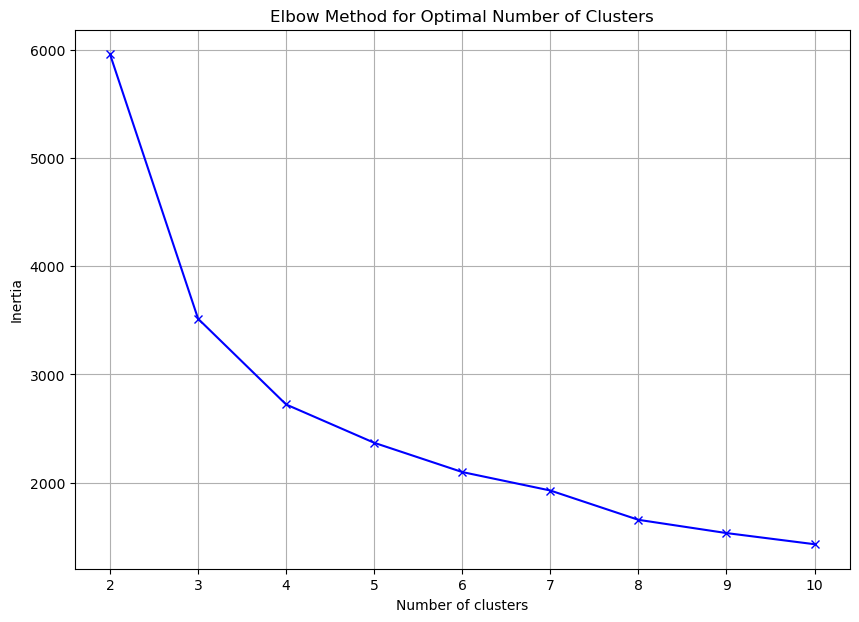

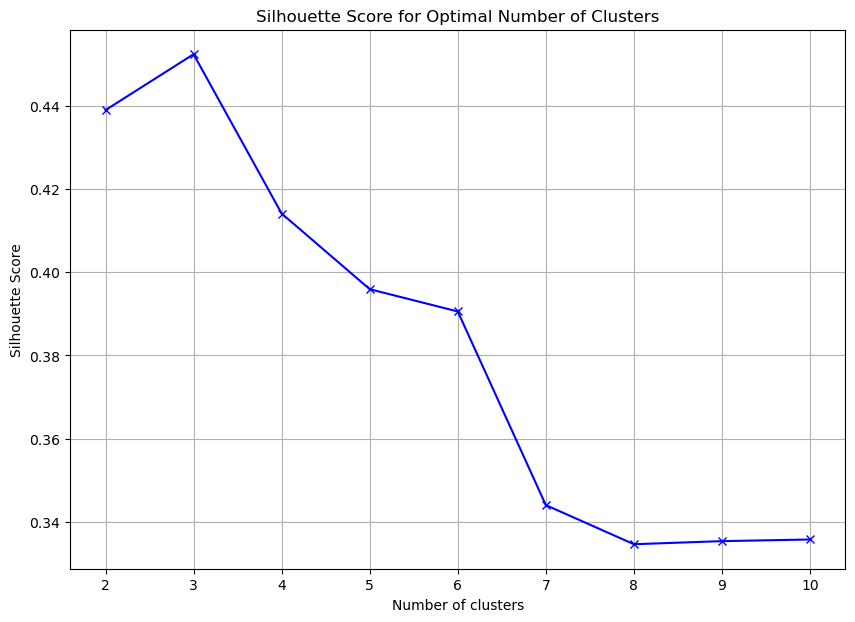

In [35]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Score with scaled data
inertia = []
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
# plt.savefig('ElbowMethodOptimalNumber_of_HierarchicalClusters.png', dpi=300)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.grid(True)
# plt.savefig('SilhouetteScoreNumber_of_HierarchicalClusters.png', dpi=300)
plt.show()